In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('train.csv')
titanic_df['data'] = 'train'
titanic_test = pd.read_csv('test.csv')
titanic_test['data'] = 'test'
titanic_df = titanic_df.append(titanic_test, sort = False, ignore_index = True)
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [6]:
titanic_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [7]:
# Cabin specify the position in the ship, which can help predicting the susvival.
# but as there are too many null values we choose to ignore it.

titanic_df.drop(columns='Cabin', inplace=True)

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train


In [9]:
# Age is the other column which has considerable number of nulls. 
# Lets check if the age of the person can be determined by title of the name. 

# titanic_train_df[titanic_train_df['Name'].str.contains('')]
# titanic_train_df[titanic_train_df['Name'].str.contains('Miss')]
# The data set is too large, so its easier to fill the nulls with average of age. 

titanic_df.Age.fillna(titanic_df.Age.median(), inplace=True)

In [10]:
titanic_df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
data             0
dtype: int64

In [11]:
titanic_df.Embarked.fillna(titanic_df.Embarked.mode()[0], inplace=True)

In [12]:
titanic_df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
data             0
dtype: int64

In [13]:
titanic_df.Fare.fillna(titanic_df.Fare.median(), inplace=True)

In [14]:
titanic_df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
data             0
dtype: int64

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train


In [16]:
# Create a new variable which is a combination of SibSp and Parch.
# Combination of these indicates the number of members in the family.

titanic_df['FamilySize'] = titanic_df.SibSp + titanic_df.Parch+1

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,data,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train,1


In [18]:
# Create bins for Age
titanic_df['AgeBins'] = pd.cut(titanic_df['Age'].astype(int), 5)

In [19]:
# Create bins for Fare
titanic_df['FareBin'] = pd.cut(titanic_df['Fare'], 4)

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,data,FamilySize,AgeBins,FareBin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train,2,"(16.0, 32.0]","(-0.512, 128.082]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train,2,"(32.0, 48.0]","(-0.512, 128.082]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train,1,"(16.0, 32.0]","(-0.512, 128.082]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train,2,"(32.0, 48.0]","(-0.512, 128.082]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train,1,"(32.0, 48.0]","(-0.512, 128.082]"


In [21]:
# Custom plot fn:
def histplot(col):
    plt. hist(x=[titanic_df[titanic_df['Survived']==1][col], titanic_df[titanic_df['Survived']==0][col]],
             stacked = True, color = ['g','r'],  label = ['Survived','Dead'])
    plt.legend()

Text(0.5, 1.0, ' Age Vs Survived')

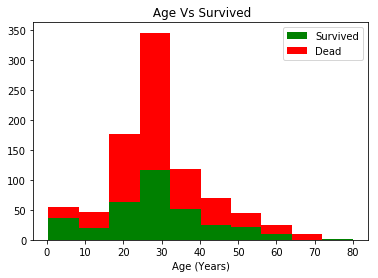

In [22]:
# Plot the graph of Age Vs Survived
histplot('Age')
plt.xlabel('Age (Years)')
plt.title(' Age Vs Survived')

Text(0.5, 1.0, 'Sex Vs Survived')

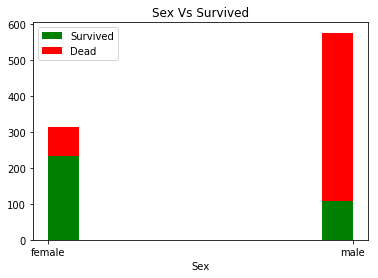

In [23]:
# Plot the graph of Sex Vs Survived
histplot('Sex')
plt.xlabel('Sex')
plt.title('Sex Vs Survived')

Text(0.5, 1.0, 'Pclass Vs Survived')

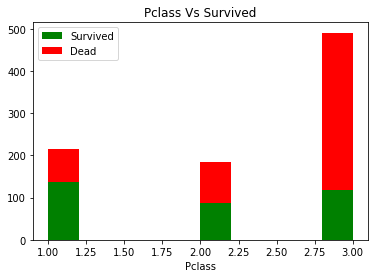

In [24]:
# Plot the graph of Pclass Vs Survived
histplot('Pclass')
plt.xlabel('Pclass')
plt.title('Pclass Vs Survived')

Text(0.5, 1.0, 'FamilySize Vs Survived')

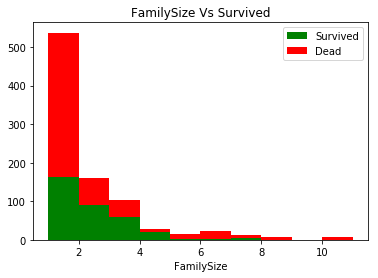

In [25]:
# Plot the graph of FamilySize Vs Survived

histplot('FamilySize')
plt.xlabel('FamilySize')
plt.title('FamilySize Vs Survived')

In [26]:
# We can safely remove some of the columns like Ticket, data, Sibsp, Parch
titanic_df = titanic_df.drop(['Ticket', 'SibSp', 'Parch', 'Name', 'Age', 'Fare'], axis=1)

In [27]:
dummies = pd.get_dummies(data=titanic_df, columns=['Sex', 'Pclass', 'Embarked',
                                                   'FamilySize', 'AgeBins', 'FareBin'], drop_first=True)

In [28]:
titanic_df = pd.concat([titanic_df, dummies], axis=1)

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,data,FamilySize,AgeBins,FareBin,PassengerId,...,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
0,1,0.0,3,male,S,train,2,"(16.0, 32.0]","(-0.512, 128.082]",1,...,0,0,0,1,0,0,0,0,0,0
1,2,1.0,1,female,C,train,2,"(32.0, 48.0]","(-0.512, 128.082]",2,...,0,0,0,0,1,0,0,0,0,0
2,3,1.0,3,female,S,train,1,"(16.0, 32.0]","(-0.512, 128.082]",3,...,0,0,0,1,0,0,0,0,0,0
3,4,1.0,1,female,S,train,2,"(32.0, 48.0]","(-0.512, 128.082]",4,...,0,0,0,0,1,0,0,0,0,0
4,5,0.0,3,male,S,train,1,"(32.0, 48.0]","(-0.512, 128.082]",5,...,0,0,0,0,1,0,0,0,0,0


In [30]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked', 'data',
       'FamilySize', 'AgeBins', 'FareBin', 'PassengerId', 'Survived', 'data',
       'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'FamilySize_2', 'FamilySize_3', 'FamilySize_4', 'FamilySize_5',
       'FamilySize_6', 'FamilySize_7', 'FamilySize_8', 'FamilySize_11',
       'AgeBins_(16.0, 32.0]', 'AgeBins_(32.0, 48.0]', 'AgeBins_(48.0, 64.0]',
       'AgeBins_(64.0, 80.0]', 'FareBin_(128.082, 256.165]',
       'FareBin_(256.165, 384.247]', 'FareBin_(384.247, 512.329]'],
      dtype='object')

In [31]:
titanic_df1 = titanic_df

In [32]:
titanic_df1 = titanic_df1.drop(['Pclass', 'Sex', 'Embarked', 'FamilySize', 'AgeBins', 'FareBin'], axis=1)

In [33]:
titanic_df1 = titanic_df1.iloc[:, 3:]

In [34]:
titanic_df1.head()

,PassengerId,Survived,data,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,FamilySize_2,FamilySize_3,...,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
0,1,0.0,train,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1.0,train,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1.0,train,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1.0,train,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0.0,train,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
# Spearate the Trining and test data set 

training_df = titanic_df1[titanic_df1['data']=='train']

In [36]:
testData_df = titanic_df1[titanic_df1['data']=='test']

In [37]:
training_df.head()

,PassengerId,Survived,data,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,FamilySize_2,FamilySize_3,...,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
0,1,0.0,train,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1.0,train,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1.0,train,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1.0,train,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0.0,train,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
testData_df.head()

,PassengerId,Survived,data,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,FamilySize_2,FamilySize_3,...,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
891,892,NaN,test,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
892,893,NaN,test,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
893,894,NaN,test,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
894,895,NaN,test,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
895,896,NaN,test,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [39]:
training_df = training_df.drop(['data'], axis=1)

In [40]:
testData_df = testData_df.drop(['data'], axis=1)

In [41]:
training_df.head()

,PassengerId,Survived,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,FamilySize_2,FamilySize_3,FamilySize_4,...,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
0,1,0.0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1.0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1.0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0.0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
testData_df.head()

,PassengerId,Survived,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,FamilySize_2,FamilySize_3,FamilySize_4,...,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
891,892,NaN,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
892,893,NaN,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
893,894,NaN,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
894,895,NaN,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
895,896,NaN,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
training_df_x = training_df.iloc[:, 2:]

In [44]:
training_df_x.head()

,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [45]:
training_df_y = training_df['Survived']

In [46]:
# Logistic Regression

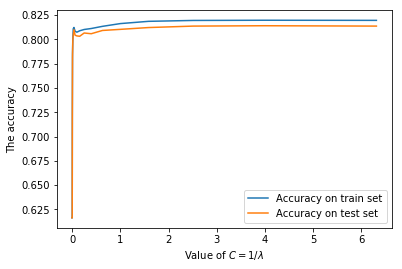

Best C: 3.981071705534969
Best Score: 0.8140665918443696


In [47]:
C = np.logspace(-4, 0.8, 25)
hyperparameters = dict(C = C)
lreg = LogisticRegression(penalty = 'l2', max_iter = 10000, tol = 0.001, solver = 'lbfgs')
cv = RepeatedKFold(n_splits=10, n_repeats = 3)
grid_lreg = GridSearchCV(lreg
                        , hyperparameters
                        , cv = cv
                        , verbose = 0
                        , scoring = 'accuracy'
                        , return_train_score = True)
grid_lreg.fit(training_df_x, training_df_y)

plt.plot(C, grid_lreg.cv_results_['mean_train_score'], label = 'Accuracy on train set')
plt.plot(C, grid_lreg.cv_results_['mean_test_score'], label = 'Accuracy on test set')
plt.legend()
plt.xlabel('Value of $C=1/\lambda $')
plt.ylabel("The accuracy")
plt.show()

print('Best C:', grid_lreg.best_estimator_.get_params()['C'])
print('Best Score:', grid_lreg.best_score_)

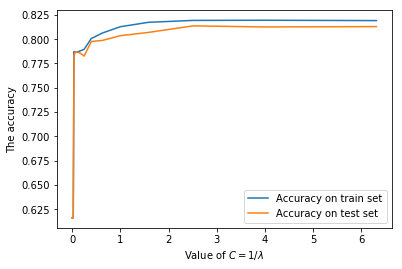

Best C: 2.511886431509577
Best Score: 0.813692480359147


In [48]:
lreg1 = LogisticRegression(penalty = 'l1', max_iter = 10000, tol = 0.001, solver = 'liblinear')
grid_lreg1 = GridSearchCV(lreg1
                        , hyperparameters
                        , cv = cv
                        , verbose = 0
                        , scoring = 'accuracy'
                        , return_train_score = True)
grid_lreg1.fit(training_df_x, training_df_y)

plt.plot(C, grid_lreg1.cv_results_['mean_train_score'], label = 'Accuracy on train set')
plt.plot(C, grid_lreg1.cv_results_['mean_test_score'], label = 'Accuracy on test set')
plt.legend()
plt.xlabel('Value of $C=1/\lambda $')
plt.ylabel("The accuracy")
plt.show()

print('Best C:', grid_lreg1.best_estimator_.get_params()['C'])
print('Best Score:', grid_lreg1.best_score_)

In [49]:
testData_x = testData_df.iloc[:, 2:]

In [50]:
lreg1_ypred = grid_lreg1.predict(testData_x)

In [51]:
testData_df['Survived'] = lreg1_ypred

In [52]:
testData_df.head()

,PassengerId,Survived,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,FamilySize_2,FamilySize_3,FamilySize_4,...,FamilySize_7,FamilySize_8,FamilySize_11,"AgeBins_(16.0, 32.0]","AgeBins_(32.0, 48.0]","AgeBins_(48.0, 64.0]","AgeBins_(64.0, 80.0]","FareBin_(128.082, 256.165]","FareBin_(256.165, 384.247]","FareBin_(384.247, 512.329]"
891,892,0.0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
892,893,1.0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
893,894,0.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
894,895,0.0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
895,896,1.0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
lreg1_test = testData_df[['PassengerId', 'Survived']]

In [54]:
lreg1_test.to_csv('lreg1_test.csv', index=False)